In [29]:
from deuces import Deck, Evaluator
#matplotlib.use('Agg')
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


def build_dataframe(nb_hands):
    decks = [ Deck() for _ in range(nb_hands) ]
    boards = [ deck.draw(5) for deck in decks ]
    player1 = [ deck.draw(2) for deck in decks ]
    player2 = [ deck.draw(2) for deck in decks ]
    player3 = [ deck.draw(2) for deck in decks ]
    player4 = [ deck.draw(2) for deck in decks ]

    e = Evaluator()
    scores = [
        (
            e.evaluate(b, p1),
            e.evaluate(b, p2),
            e.evaluate(b, p3),
            e.evaluate(b, p4)
        )
        for (b, p1, p2, p3, p4) in zip(
            boards,
            player1,
            player2,
            player3,
            player4
        )
    ]

    df = pd.DataFrame(scores)
    return df

<h1>Generate pnl plot 1</h1>

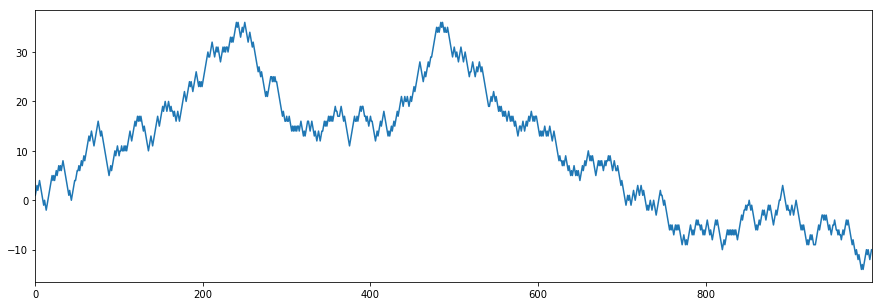

In [30]:
%matplotlib inline
# commented out cos it gave me a warning
#matplotlib.use('Agg')
import matplotlib
import matplotlib.pyplot as plt

df = build_dataframe(1000)

pnl = df[1] - df[0]
pnl.ix[pnl != 0] = pnl / abs(pnl)
cum_pnl = pnl.cumsum()

cum_pnl.plot(figsize=(15,5))

<h1>Generate pnl plot 2</h1>

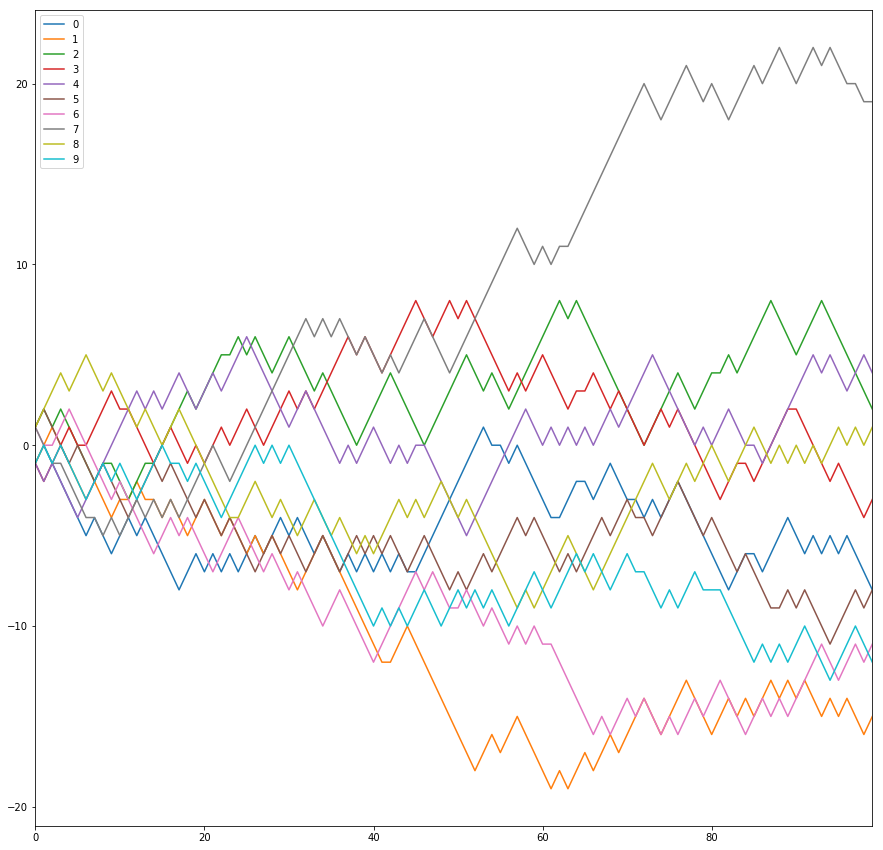

In [31]:
# generate pnl plot 2
import random
random.seed(0)

df = build_dataframe(1000)

pnl = df[1] - df[0]
pnl.ix[pnl != 0] = pnl / abs(pnl)

pnls = pd.DataFrame(
    pnl.values.reshape(100, 10)
)
cum_pnls = pnls.cumsum()
cum_pnls.plot(figsize=(15,15))

<h1>Scatter Matrix 1</h1>

[]

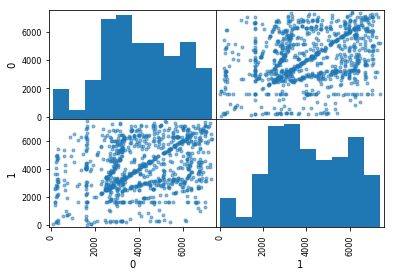

In [32]:
random.seed(0)


decks = [ Deck() for _ in range(1000) ]
boards = [ deck.draw(5) for deck in decks ]
player1 = [ deck.draw(2) for deck in decks ]
player2 = [ deck.draw(2) for deck in decks ]

e = Evaluator()
scores = [
    (e.evaluate(b, p1), e.evaluate(b, p2))
    for (b, p1, p2) in zip(boards, player1, player2)
]

df = pd.DataFrame(scores)
pd.scatter_matrix(df)
plt.plot(figsize=(15,15))

[]

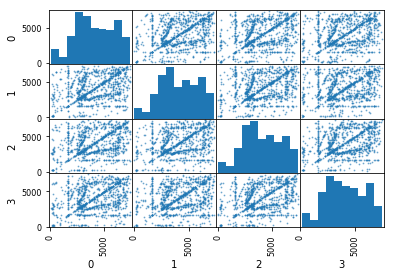

In [33]:
df = build_dataframe(1000)
pd.scatter_matrix(df, s=3)
plt.plot(figsize=(15,15))

In [34]:
from collections import Counter
from datetime import datetime
from deuces import (
    Deck,
    Evaluator
)
import random
random.seed(1)


print('Generating the hands.')
print(datetime.now())
hands = [ Deck().draw(5) for _ in range(1000000) ]

e = Evaluator()
print('Scoring them.')
print(datetime.now())
scores = [ e.evaluate(x, []) for x in hands ]
ranks = [ e.get_rank_class(s) for s in scores ]
rank_strings = [ e.class_to_string(r) for r in ranks ]

print('Counting them.')
print(datetime.now())
c = Counter(rank_strings)
for i in c.most_common(10):
    print(i)

Generating the hands.
2017-04-11 16:10:02.765168
Scoring them.
2017-04-11 16:11:00.237915
Counting them.
2017-04-11 16:11:04.020924
('High Card', 501916)
('Pair', 422263)
('Two Pair', 47296)
('Three of a Kind', 20910)
('Straight', 3899)
('Flush', 1996)
('Full House', 1454)
('Four of a Kind', 249)
('Straight Flush', 17)
